# Predicting vehicle collisions for the area of Seattle
`This notebook is part of the final project for IBM Data Science Professional Certificate.`


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Introduction: Business Problem <a name="introduction"></a>

<h3>1.1  Background</h3><br>
The Seattle Department of Transportation’s annual traffic report poses a significant challenge to governments to review their road safety policies and take new initiatives that make drivers' lives safer.

<h3>1.2  Problem/Opportunity Statement</h3><br>
Given this scenario, the objective of this project is to provide the best classification model to predict the type of collision (an auto accident involving injury or property damage) based on the weather and road conditions during the collision, the geographical area where the collision took place, the type of the collision and the day of the week that the collision occurred.

<h3>1.3 Interest</h3><br>
The information produced through this model may serve as an instrument for decision support in the prioritization of actions, such as changing road infrastructure, the procurement and installation of the road signs to reflect the weather conditions. Moreover, these informations could alert drivers, given the weather and road conditions about the possibility of a car accident and the severity of it, which would allow the driver to drive more carefully or, even change his itinerary.

## 2. Data <a name="data"></a>

<h3>2.1 Data sources</h3><br>
The data used corresponds to the Seattle Department of Transportation's annual Traffic Report Dataset.

|Attribute| Description|
|---|:---|
|SEVERITYCODE|A code that corresponds collision: 2—injury, 1—prop damage.|
|SEVERITYDESC|Description collision : Injury Collision, Property Damage Only Collision.|
|WEATHER|A description of the weather conditions during the time of the collision : Clear, Severe Crosswind, Sleet/Hail/Freezing Rain, Snowing, Overcast, Raining.|
|ROADCOND|The condition of the road during the collision: Wet, Dry, Ice, Standing Water, Sand/Mud/Dirt, Oil, Snow/Slush.|
|LOCATION|The geographical area where the collision took place.|
|INCDATE|The date of the incident.|
|ADDRTYPE|Collision address type: • Block • Intersection.|

_For further details about the data set used, please consult the following link:_ [Data Set Summary](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf)

<br>

<h3>2.2 Data cleaning</h3><br>
As part of the cleaning process the data was downloaded and extracted, the whole dataset was loaded and converted into a pandas dataframe, allowing for a better use of the data set to get a sense of the data structure, missing and bad data, and what kind of data processing cleaning should take place.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Downloaded, extracted, and loaded the data (csv files):
path='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(path)
df.head()

C:\Users\srodr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
# So the dataframe consists of 194 673 vehicle collisions.
df.shape

(194673, 38)

In [4]:
df.isna() #filtering on missing data

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
194669,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
194670,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
194671,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False


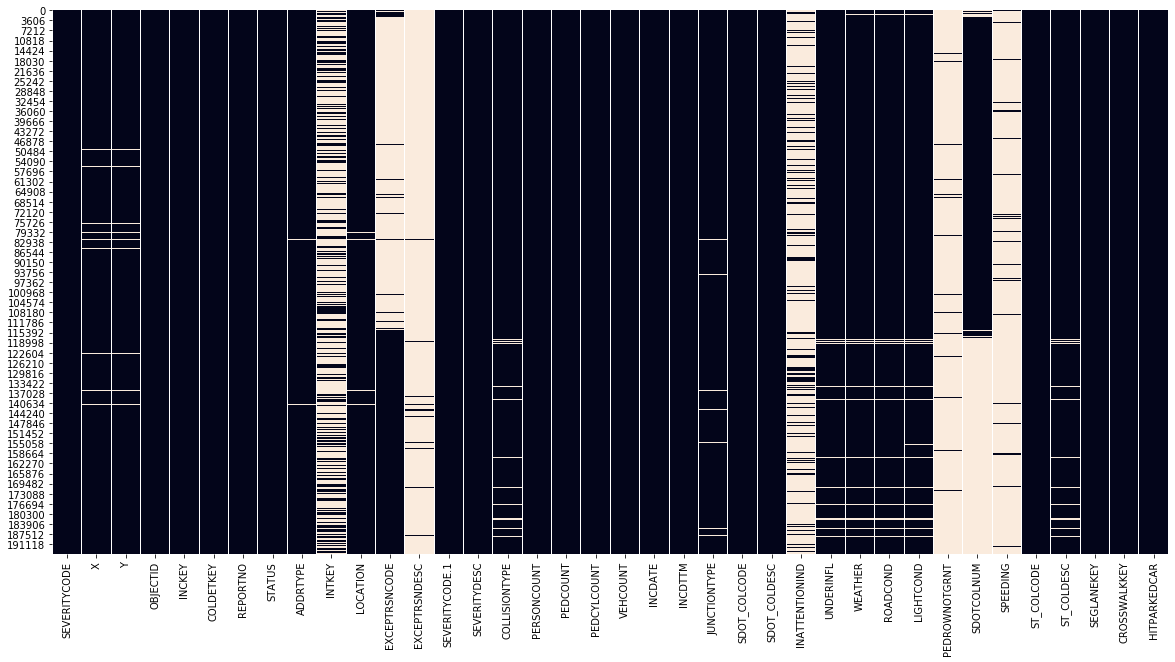

In [5]:
# method seaborn.heatmap, to visualize the location of missing values.
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False)

In [6]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

SEVERITYCODE      0.000000
SEGLANEKEY        0.000000
SDOT_COLDESC      0.000000
SDOT_COLCODE      0.000000
INCDTTM           0.000000
INCDATE           0.000000
VEHCOUNT          0.000000
CROSSWALKKEY      0.000000
PEDCOUNT          0.000000
PERSONCOUNT       0.000000
SEVERITYDESC      0.000000
SEVERITYCODE.1    0.000000
PEDCYLCOUNT       0.000000
HITPARKEDCAR      0.000000
OBJECTID          0.000000
COLDETKEY         0.000000
REPORTNO          0.000000
STATUS            0.000000
INCKEY            0.000000
ST_COLCODE        0.000092
ADDRTYPE          0.009894
LOCATION          0.013751
UNDERINFL         0.025088
COLLISIONTYPE     0.025191
ST_COLDESC        0.025191
ROADCOND          0.025746
WEATHER           0.026100
LIGHTCOND         0.026557
X                 0.027400
Y                 0.027400
JUNCTIONTYPE      0.032511
SDOTCOLNUM        0.409595
EXCEPTRSNCODE     0.564341
INTKEY            0.665747
INATTENTIONIND    0.846897
SPEEDING          0.952058
EXCEPTRSNDESC     0.971039
P

In [7]:
# Dropping unnecessary columns : Delete all the columns that have more than 90% empty values
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
df.shape

(194673, 35)

In [8]:
pd.set_option('display.max_columns', 35) #see all columns
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,6354039.0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,4323031.0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,4028032.0,10,Entering at angle,0,0,N


<h3>2.3 Feature selection</h3><br>

In short, the main changes were as follows:
1. Convert the column INCDATE (the date of the incident) from type "str" to "datetime"
2. Remove rows with missing values on columns "latitude" and "longitude"
3. Create a new column 'WEEKDAY' that contains the days of the week, from the column INCDATE. This new column serves as an indicator the days of the week that are more dangerous for drivers.

In addition to these, a new column was created “DISTRICT”, grouping car accidents by area. For this, columns "longitude" and "latitude" were used, dividing Seattle into four districts.
   * District 1: from latitude 47.4 to latitude 47.5.
   * District 2: the latitudes 47.60, 47.61, 47.62 and 47.63.
   * District 3: the latitudes 47.64, 47.65, 47.66 and 47.67.
   * District 4: the latitudes 47.68, 47.69 and 47.7. 

In [9]:
df =  df[df['COLLISIONTYPE'] != 'Parked Car']
df =  df[df['COLLISIONTYPE'] != 'Other']

In [10]:
#Convert to date time object
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

In [11]:
s = {1:0,
        2:1}

df['SEVERITYCODE'] = df['SEVERITYCODE'].map(s)

In [12]:
# To fill a column with the days of the week
df['WEEKDAY'] = df['INCDATE'].dt.day_name()

In [13]:
df.dropna(subset = ['X', 'Y'], inplace = True)

In [14]:
w = {'Clear':0,
        'Raining':1,
        'Overcast':2,
        'Unknown':3,
        'Snowing':4,
        'Other':5,
        'Fog/Smog/Smoke':6,
        'Sleet/Hail/Freezing Rain':7,
        'Blowing Sand/Dirt':8,
        'Severe Crosswind':9,
        'Partly Cloudy':10}

df['WEATHER'] = df['WEATHER'].map(w)

In [15]:
df['WEATHER'] = df['WEATHER'].replace(np.nan, 3)

In [16]:
r = {'Dry':0,
        'Wet':1,
        'Unknown':2,
        'Ice':3,
        'Snow/Slush':4,
        'Other':5,
        'Standing Water':6,
        'Sand/Mud/Dirt':7,
        'Oil':8}

df['ROADCOND'] = df['ROADCOND'].map(r)

In [17]:
df['ROADCOND'] = df['ROADCOND'].replace(np.nan, 2)

In [18]:
a = {'Block':0,
        'Intersection':1}

df['ADDRTYPE'] = df['ADDRTYPE'].map(a)

In [19]:
k = {'Monday':0,
        'Tuesday':1,
        'Wednesday':2,
        'Thursday':3,
        'Friday':4,
        'Saturday':5,
        'Sunday':6}

df['WEEKDAY'] = df['WEEKDAY'].map(k)

In [20]:
df['X'] = df['X'].astype('str')
df['Y'] = df['Y'].astype('str')

In [21]:
d1 = df[df.Y.str.startswith('47.4') | df.Y.str.startswith('47.5')]

In [22]:
d2 = df[df.Y.str.startswith('47.60') | df.Y.str.startswith('47.61') | df.Y.str.startswith('47.62') | 
         df.Y.str.startswith('47.63')]

In [23]:
d3 = df[df.Y.str.startswith('47.64') | df.Y.str.startswith('47.65') | df.Y.str.startswith('47.66') |
         df.Y.str.startswith('47.67')]

In [24]:
d4 = df[df.Y.str.startswith('47.68') | df.Y.str.startswith('47.69') | df.Y.str.startswith('47.7')]

In [25]:
d1['DISTRICT'] = 1
d2['DISTRICT'] = 2
d3['DISTRICT'] = 3
d4['DISTRICT'] = 4

C:\Users\srodr\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\srodr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\srodr\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [26]:
df = pd.concat([d1, d2, d3, d4])

In [27]:
df['X'] = df['X'].astype(float)
df['Y'] = df['Y'].astype(float)

d1['X'] = d1['X'].astype(float)
d1['Y'] = d1['Y'].astype(float)

d2['X'] = d2['X'].astype(float)
d2['Y'] = d2['Y'].astype(float)

d3['X'] = d3['X'].astype(float)
d3['Y'] = d3['Y'].astype(float)

d4['X'] = d4['X'].astype(float)
d4['Y'] = d4['Y'].astype(float)

In [28]:
df.shape

(120681, 37)

## 3. Methodology <a name="methodology"></a>

The methodology used was based on the CRISP-DM (Cross Industry Standard Process for Data Mining) model. 

In first step, the analytical approach was identified, based on the question: "In a given condition of road, climate, day of the week and an area of the city of Seattle, if an accident occurs, what would be the severity: an auto accident involving injury or property damage?

The second step was to identify the analytical approach, that is, the type of model needed to address the question (defined in the first step) more effectively, from which a classification model was used to identify the combination of conditions that lead to the result of each accident.

In third step, the phases "data requirements", "data collection", "data understanding" and "data preparation" were performed in a way that addresses missing or invalid values and removes duplicates, toward ensuring that everything was properly formatted.

In fourth and final step, the modeling and evaluation phases were applied to the model building as such, but it was also to see if the model meets the initial question.



## 4. Analysis <a name="analysis"></a>

At this stage it was possible to identify the relationships between variables, assess them and do some analysis.

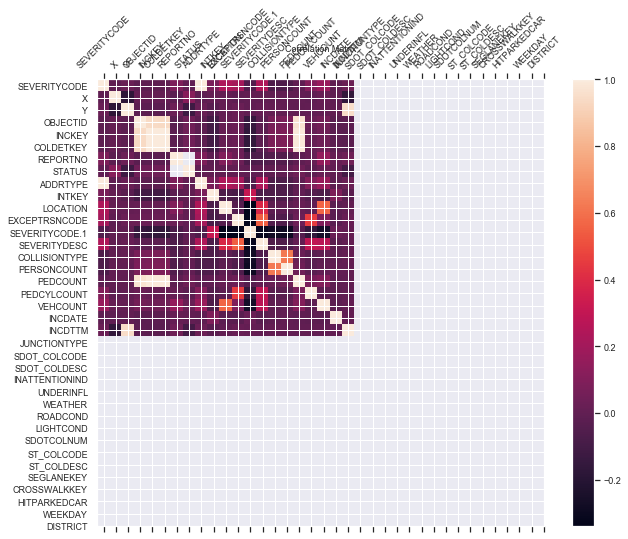

In [616]:
f = plt.figure(figsize=(10, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=9, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=9)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=9)
plt.title('Correlation Matrix', fontsize=9);

In [629]:
# SEVERITYCODE = {1:Property Damage Only Collisi, Injury Collision:1}
# WEATHER = {'Clear':0, 'Raining':1, 'Overcast':2, 'Unknown':3, 'Snowing':4,'Other':5,'Fog/Smog/Smoke':6,
  #Sleet/Hail/Freezing Rain':7,'Blowing Sand/Dirt':8,'Severe Crosswind':9,'Partly Cloudy':10}

pd.crosstab(df['SEVERITYCODE'], df['WEATHER'])

WEATHER,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
SEVERITYCODE,,,,,,,,,,,
0,41684,13232,10625,5811,228,168,191,39,17,9,0
1,30084,9251,7265,1714,112,89,128,19,10,2,3


In [630]:
df['WEATHER'].value_counts()

0.0     71768
1.0     22483
2.0     17890
3.0      7525
4.0       340
6.0       319
5.0       257
7.0        58
8.0        27
9.0        11
10.0        3
Name: WEATHER, dtype: int64

In [631]:
# SEVERITYCODE = {1:Property Damage Only Collisi, Injury Collision:1}
# District 1: from latitude 47.4 to latitude 47.5.
# District 2: the latitudes 47.60, 47.61, 47.62 and 47.63.
# District 3: the latitudes 47.64, 47.65, 47.66 and 47.67.
# District 4: the latitudes 47.68, 47.69 and 47.7. 

pd.crosstab(df['SEVERITYCODE'], df['DISTRICT'])

DISTRICT,1,2,3,4
SEVERITYCODE,,,,
0,24843,22346,12263,12552
1,16004,14258,8916,9499


In [632]:
df['DISTRICT'].value_counts()

1    40847
2    36604
4    22051
3    21179
Name: DISTRICT, dtype: int64

In [633]:
# SEVERITYCODE = {1:Property Damage Only Collisi, Injury Collision:1}
# ROADCOND = {'Dry':0,'Wet':1,Unknown':2,'Ice':3,'Snow/Slush':4,'Other':5,'Standing Water':6,'Sand/Mud/Dirt':7,'Oil':8}

pd.crosstab(df['SEVERITYCODE'], df['ROADCOND'])

ROADCOND,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
SEVERITYCODE,,,,,,,,,
0,46852,18782,5836,245,214,29,29,6,11
1,33678,13010,1664,160,111,19,15,11,9


In [634]:
df['ROADCOND'].value_counts()

0.0    80530
1.0    31792
2.0     7500
3.0      405
4.0      325
5.0       48
6.0       44
8.0       20
7.0       17
Name: ROADCOND, dtype: int64

In [625]:
# SEVERITYCODE = {1:Property Damage Only Collisi, Injury Collision:1}
# WEEKDAY = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

pd.crosstab(df['SEVERITYCODE'], df['WEEKDAY'])

WEEKDAY,0,1,2,3,4,5,6
SEVERITYCODE,,,,,,,
0,9612,10971,11063,11305,12554,9410,7089
1,6753,7427,7419,7681,8090,6515,4792


In [626]:
df['WEEKDAY'].value_counts()

4    20644
3    18986
2    18482
1    18398
0    16365
5    15925
6    11881
Name: WEEKDAY, dtype: int64

In [627]:
# SEVERITYCODE = {1:Property Damage Only Collisi, Injury Collision:1}
# ADDRTYPE= {'Block':0, 'Intersection':1}

pd.crosstab(df['SEVERITYCODE'], df['ADDRTYPE'])

ADDRTYPE,0,1
SEVERITYCODE,,
0,38942,33062
1,21983,26694


In [628]:
df['ADDRTYPE'].value_counts()

0    60925
1    59756
Name: ADDRTYPE, dtype: int64

**Based on this heat map**, we can clearly see the areas with the highest risk of car accidents, as well as the areas with the lowest accident rate. Thus, the blue areas indicate a low volume of collisions and the red areas a high volume.

In [635]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: ...working... done

# All requested packages already installed.



In [636]:
def generateBaseMap(default_location=[47.6062, -122.3321], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [637]:
from folium.plugins import HeatMap
base_map = generateBaseMap()
HeatMap(data=df[['Y', 'X']].groupby(['Y', 'X']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [ ]:
from folium import plugins
# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(base_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, in zip(df.Y, df.X):
    folium.Marker(
        location=[lat, lng],
        icon=None,
    ).add_to(incidents)

# display map
base_map

## Predictive Modeling

In [29]:
df = df[['SEVERITYCODE', 'DISTRICT', 'WEATHER', 'ROADCOND', 'ADDRTYPE', 'WEEKDAY']]

In [30]:
df.dtypes

SEVERITYCODE      int64
DISTRICT          int64
WEATHER         float64
ROADCOND        float64
ADDRTYPE          int64
WEEKDAY           int64
dtype: object

In [31]:
df.isnull().sum()

SEVERITYCODE    0
DISTRICT        0
WEATHER         0
ROADCOND        0
ADDRTYPE        0
WEEKDAY         0
dtype: int64

In [32]:
df['WEATHER'] = df['WEATHER'].values.astype(np.int64)
df['ROADCOND'] = df['ROADCOND'].values.astype(np.int64)

## One Hot Encoding

In [33]:
df.groupby(['WEEKDAY'])['SEVERITYCODE'].value_counts(normalize=True)

WEEKDAY  SEVERITYCODE
0        0               0.587351
         1               0.412649
1        0               0.596315
         1               0.403685
2        0               0.598582
         1               0.401418
3        0               0.595439
         1               0.404561
4        0               0.608119
         1               0.391881
5        0               0.590895
         1               0.409105
6        0               0.596667
         1               0.403333
Name: SEVERITYCODE, dtype: float64

In [34]:
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND  SEVERITYCODE
0         0               0.581796
          1               0.418204
1         0               0.590778
          1               0.409222
2         0               0.778133
          1               0.221867
3         0               0.604938
          1               0.395062
4         0               0.658462
          1               0.341538
5         0               0.604167
          1               0.395833
6         0               0.659091
          1               0.340909
7         1               0.647059
          0               0.352941
8         0               0.550000
          1               0.450000
Name: SEVERITYCODE, dtype: float64

In [35]:
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER  SEVERITYCODE
0        0               0.580816
         1               0.419184
1        0               0.588534
         1               0.411466
2        0               0.593907
         1               0.406093
3        0               0.772226
         1               0.227774
4        0               0.670588
         1               0.329412
5        0               0.653696
         1               0.346304
6        0               0.598746
         1               0.401254
7        0               0.672414
         1               0.327586
8        0               0.629630
         1               0.370370
9        0               0.818182
         1               0.181818
10       1               1.000000
Name: SEVERITYCODE, dtype: float64

In [36]:
df.groupby(['DISTRICT'])['SEVERITYCODE'].value_counts(normalize=True)

DISTRICT  SEVERITYCODE
1         0               0.608196
          1               0.391804
2         0               0.610480
          1               0.389520
3         0               0.579017
          1               0.420983
4         0               0.569226
          1               0.430774
Name: SEVERITYCODE, dtype: float64

In [37]:
df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

ADDRTYPE  SEVERITYCODE
0         0               0.639179
          1               0.360821
1         0               0.553283
          1               0.446717
Name: SEVERITYCODE, dtype: float64

In [38]:
X = df[['DISTRICT', 'WEATHER', 'ROADCOND', 'ADDRTYPE', 'WEEKDAY']].values
X[0:5]

array([[1, 1, 1, 1, 2],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 3],
       [1, 1, 1, 0, 2],
       [1, 0, 0, 0, 4]], dtype=int64)

In [39]:
y = df["SEVERITYCODE"]
y[0:5]

4     1
9     1
11    0
12    0
18    1
Name: SEVERITYCODE, dtype: int64

In [503]:
# The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, 
# and the random_state ensures that we obtain the same splits.
from sklearn.model_selection import train_test_split
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [504]:
# Print the shape of X_trainset and y_trainset. Ensure that the dimensions match
print(X_train.shape)
print(y_train.shape)

(96544, 5)
(96544,)


In [505]:
# Print the shape of X_testset and y_testset. Ensure that the dimensions match your code
print(X_test.shape)
print(y_test.shape)

(24137, 5)
(24137,)


In [506]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.1 ,  0.28,  0.87,  1.01, -0.46],
       [-1.1 , -0.69, -0.62,  1.01, -1.52],
       [-1.1 , -0.69, -0.62,  1.01,  0.07],
       [-1.1 ,  0.28,  0.87, -0.99, -0.46],
       [-1.1 , -0.69, -0.62, -0.99,  0.6 ]])

## Classification

## K Nearest Neighbor(KNN)

In [507]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [508]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

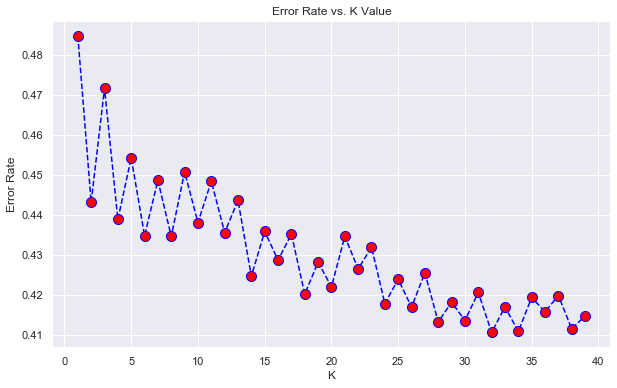

In [509]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [510]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)
print('CONFUSION_MATRIX :\n')
print(confusion_matrix(pred_i,y_test))
print('\n')
print('REPORT :\n')
print(classification_report(pred_i,y_test))

CONFUSION_MATRIX :

[[9918 6317]
 [4563 3339]]


REPORT :

              precision    recall  f1-score   support

           0       0.68      0.61      0.65     16235
           1       0.35      0.42      0.38      7902

    accuracy                           0.55     24137
   macro avg       0.52      0.52      0.51     24137
weighted avg       0.57      0.55      0.56     24137



In [511]:
print('ACCURACY :')

metrics.accuracy_score(pred_i,y_test)

ACCURACY :


0.5492397563906036

## Decision Tree

In [512]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
classification = dc.fit(X_train,y_train)
prediction = dc.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [513]:
print('CONFUSION_MATRIX :\n')

print(confusion_matrix(prediction,y_test))

CONFUSION_MATRIX :

[[14013  9283]
 [  468   373]]


In [514]:
print('REPORT :\n')
print(classification_report(prediction,y_test))

REPORT :

              precision    recall  f1-score   support

           0       0.97      0.60      0.74     23296
           1       0.04      0.44      0.07       841

    accuracy                           0.60     24137
   macro avg       0.50      0.52      0.41     24137
weighted avg       0.94      0.60      0.72     24137



In [515]:
print('ACCURACY :\n')
metrics.accuracy_score(prediction,y_test)

ACCURACY :



0.5960144176989683

## Support Vector Machine

In [516]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [517]:
print('CLASSIFICATION_REPORT :\n')
print(metrics.classification_report(y_pred,y_test))

CLASSIFICATION_REPORT :

              precision    recall  f1-score   support

           0       1.00      0.60      0.75     24134
           1       0.00      0.67      0.00         3

    accuracy                           0.60     24137
   macro avg       0.50      0.63      0.38     24137
weighted avg       1.00      0.60      0.75     24137



In [518]:
print('CONFUSION MATRIX :\n')
print(metrics.confusion_matrix(y_pred,y_test))

CONFUSION MATRIX :

[[14480  9654]
 [    1     2]]


In [519]:
print('ACCURACY :\n')
print(metrics.accuracy_score(y_pred,y_test))

ACCURACY :

0.5999917139661102


## Logistic Regression

In [520]:
from sklearn.linear_model import LogisticRegression

In [521]:
linear = LogisticRegression(fit_intercept=True)

In [522]:
linear.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [523]:
y_pred = linear.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Model Evaluation using Test set

In [524]:
print('CLASSIFICATION_REPORT :\n');
print(metrics.classification_report(y_pred,y_test))

CLASSIFICATION_REPORT :

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     23968
           1       0.01      0.48      0.02       169

    accuracy                           0.60     24137
   macro avg       0.50      0.54      0.38     24137
weighted avg       0.99      0.60      0.74     24137



In [525]:
print('CONFUSION_MATRIX :\n');
print(metrics.confusion_matrix(y_pred,y_test))

CONFUSION_MATRIX :

[[14393  9575]
 [   88    81]]


In [526]:
print('ACCURACY_SCORE :\n');
print(metrics.accuracy_score(y_pred,y_test))

ACCURACY_SCORE :

0.599660272610515


In [527]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [528]:
# evaluate KNN
knn_yhat = knn.predict(X_test)
jc1 = (jaccard_similarity_score(y_test, knn_yhat))
# evaluate Decision Trees
dt_yhat = dc.predict(X_test)
jc2 = (jaccard_similarity_score(y_test, dt_yhat))
#evaluate SVM
svm_yhat = svc.predict(X_test)
jc3 = (jaccard_similarity_score(y_test, svm_yhat))
# evaluate Logistic Regression
lr_yhat = linear.predict(X_test)
jc4 = (jaccard_similarity_score(y_test, lr_yhat))

list_jc = [jc1, jc2, jc3, jc4]
list_jc

C:\Users\srodr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\srodr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\srodr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\srodr\anaconda3\lib\site-pac

[0.5492397563906036, 0.5960144176989683, 0.5999917139661102, 0.599660272610515]

In [529]:
# evaluate KNN
fs1 = (f1_score(y_test, knn_yhat,average='weighted'))
# evaluate Desision Trees 
fs2 = (f1_score(y_test, dt_yhat, average='weighted'))
# evaluate SVM
fs3 = (f1_score(y_test, svm_yhat, average='weighted'))
# evaluate Logistic Regression
fs4 = (f1_score(y_test, lr_yhat, average='weighted'))

list_fs = [fs1, fs2, fs3, fs4]
list_fs

[0.5395949086333224,
 0.47352180736812305,
 0.45010896115906285,
 0.45576705988646626]

In [530]:
##lr_prob = linear.predict_proba(X_test)
LR_yhat_prob = linear.predict_proba(X_test)

list_ll = ['NA', 'NA', 'NA',(log_loss(y_test, LR_yhat_prob))]
list_ll

['NA', 'NA', 'NA', 0.6662132957391264]

## Report
Accuracy of the built model using different evaluation metrics:

In [531]:
# fomulate the report format
df = pd.DataFrame( list_jc,index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.549240,0.539595,NA
Decision Tree,0.596014,0.473522,NA
SVM,0.599992,0.450109,NA
Logistic Regression,0.599660,0.455767,0.666213


## Results and Discussion <a name="results"></a>

Based on the report, as seen before, the results show that the best model is logistic regression with log loss metric.

In addition, considering the size of the data set, + 100k, a logistic regression is more efficient in building a Machine Learning model.

In [40]:
X = np.asarray(df[['DISTRICT', 'WEATHER', 'ROADCOND', 'ADDRTYPE', 'WEEKDAY']])
X[0:5]

array([[1, 1, 1, 1, 2],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 3],
       [1, 1, 1, 0, 2],
       [1, 0, 0, 0, 4]], dtype=int64)

In [41]:
y = np.asarray(df['SEVERITYCODE'])
y [0:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [42]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.09593702,  0.27636245,  0.86848689,  1.00973407, -0.45932419],
       [-1.09593702, -0.68942959, -0.6162614 ,  1.00973407, -1.52077666],
       [-1.09593702, -0.68942959, -0.6162614 ,  1.00973407,  0.07140205],
       [-1.09593702,  0.27636245,  0.86848689, -0.99035977, -0.45932419],
       [-1.09593702, -0.68942959, -0.6162614 , -0.99035977,  0.60212829]])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (96544, 5) (96544,)
Test set: (24137, 5) (24137,)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.53071508, 0.46928492],
       [0.65880915, 0.34119085],
       [0.50719923, 0.49280077],
       ...,
       [0.57679247, 0.42320753],
       [0.63094671, 0.36905329],
       [0.57918107, 0.42081893]])

## Jaccard

In [47]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\srodr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.599660272610515

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[   81  9575]
 [   88 14393]]


Confusion matrix, without normalization
[[   81  9575]
 [   88 14393]]


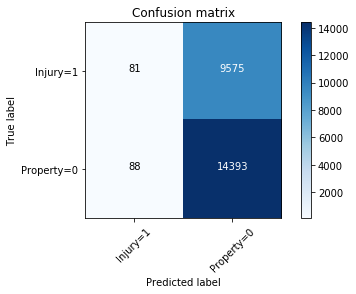

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property=0'],normalize= False,  title='Confusion matrix')

See the first line. The first line refers to accidents whose value in the test set is 1, that is, "Injury". Thus, out of 24 137 accidents, the value (or type of collision) of 9 656 of them is 1. And of these 9656, the classifier correctly predicted 81 of them as 1 and 9575 of them as 0.

This means that, for 81 accidents, the real value was 1 in the test set, and the classifier also predicted those as 1. However, while the actual label of 9 656 customers was 1, the classifier predicted those as 0, which it's not very good . We can consider it an error of the model of the first line.

Accidents with a value of 0, ie "Property", correspond to the second line. It appears that there were 14 481 accidents with a value of 0. Where, the classifier correctly predicted 14 393 of them as 0 and 88 of them wrongly as 1. Therefore, he did a good job of predicting customers with a value of 0.

A good thing about the confusion matrix is that it shows the model's ability to correctly predict or separate classes. In the specific case of the binary classifier, as in this example, we can interpret these numbers as the count of true positives, false positives, true negatives and false negatives.


In [51]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.60      0.99      0.75     14481
           1       0.48      0.01      0.02      9656

    accuracy                           0.60     24137
   macro avg       0.54      0.50      0.38     24137
weighted avg       0.55      0.60      0.46     24137



## Log loss

In [52]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6662216142597875

In [53]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.67


## Conclusion <a name="conclusion"></a>

Purpose of this project was to answer the question "In a given condition of road, climate, day of the week and an area of the city of Seattle, if an accident occurs, what would be the severity: an auto accident involving injury or property damage?", in order to aid authorities to reach decisions as regards the preventive safety measures to prevent accidents, such as changing road infrastructure, the procurement and installation of the road signs to reflect the weather conditions.  Moreover, these informations could alert drivers, given the weather and road conditions about the possibility of a car accident and the severity of it, which would allow the driver to drive more carefully or, even change his itinerary.

By analyzing accidents distribution from data, the following conclusions can be made:
(1) Friday is the day of the week with the highest risk of car crashes in Seattle.
(2) The clear weather and the dry road increase the risk of car crashes in Seattle.
(3) Areas / districts 1 (from latitude 47.4 to latitude 47.5) and 2 (latitudes 47.60, 47.61, 47.62 and 47.63.), are the places in Seattle with the highest risk of car crashes.
(4) The injury intersections and blocks have practically the same risk.

By looking at confusion matrix, in the case of Logistic Regression with Jccard index, the first line refers to accidents whose value in the test set is 1, that is, "Injury". Thus, out of 24 137 accidents, the value (or type of collision) of 9 656 of them is 1. And of these 9656, the classifier correctly predicted 81 of them as 1 and 9575 of them as 0.

This means that, for 81 accidents, the real value was 1 in the test set, and the classifier also predicted those as 1. However, while the actual label of 9 656 customers was 1, the classifier predicted those as 0, which it's not very good. We can consider it an error of the model of the first line.

Accidents with a value of 0, ie "Property", correspond to the second line. It appears that there were 14 481 accidents with a value of 0. Where, the classifier correctly predicted 14 393 of them as 0 and 88 of them wrongly as 1. Therefore, he did a good job of predicting customers with a value of 0.

A good thing about the confusion matrix is that it shows the model's ability to correctly predict or separate classes. In the specific case of the binary classifier, as in this example, we can interpret these numbers as the count of true positives, false positives, true negatives and false negatives
